In [73]:
import pandas as pd
import numpy as np                                                              #Importing packages
import matplotlib.pyplot as plt




In [74]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [75]:
import matplotlib.pyplot as plt 

%matplotlib inline

                                      # Importing matplotlib package

In [76]:
data_set = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")  #Reading CSV file
                                                                    

In [77]:
data_set.head()

,Id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [78]:
data_set.columns

Index(['Id', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [79]:
data_set.describe()

,Id,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [80]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Id                         23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


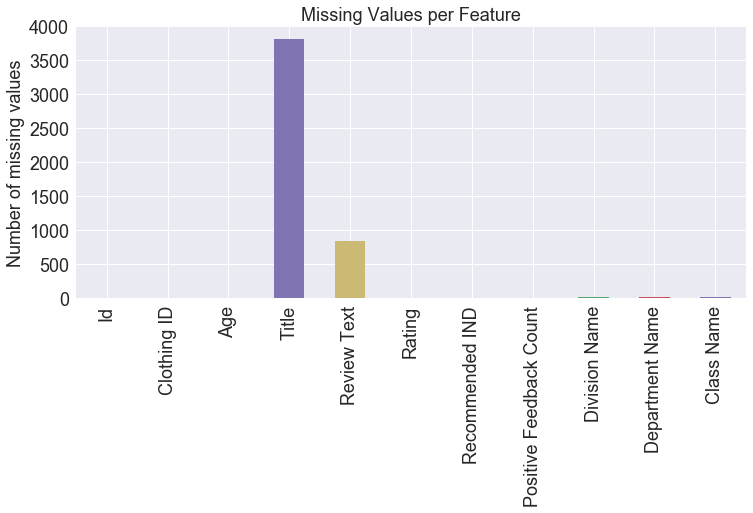

In [81]:
sns.set(rc={'figure.figsize':(12,5)})
pd.isnull(data_set).sum().plot(kind='bar',fontsize=18)
plt.ylabel('Number of missing values',fontsize=18)                       # Missing values for each feature
plt.title('Missing Values per Feature',fontsize=18);

Exploratory Data Analysis

In [82]:
data_set.shape

(23486, 11)

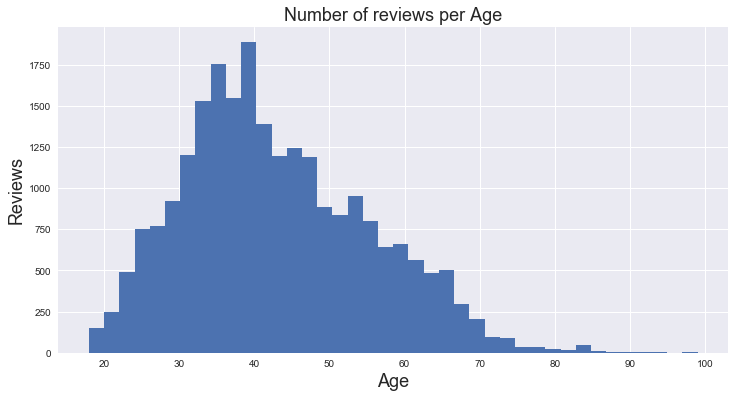

In [83]:
sns.set(rc={'figure.figsize':(12,6)})
plt.hist(data_set.Age, bins=40)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Reviews',fontsize=18)
plt.title('Number of reviews per Age',fontsize=18);            # Age distribution for reviews

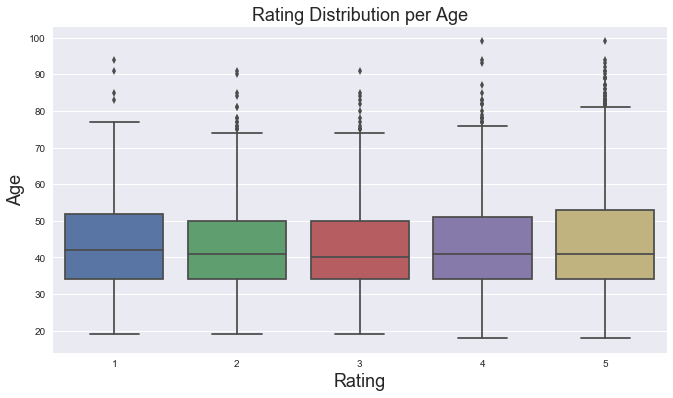

In [84]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'Rating', y = 'Age',data = data_set)
plt.xlabel('Rating',fontsize=18)
plt.ylabel('Age',fontsize=18)
plt.title('Rating Distribution per Age',fontsize=18);

Text(0,0.5,'count')

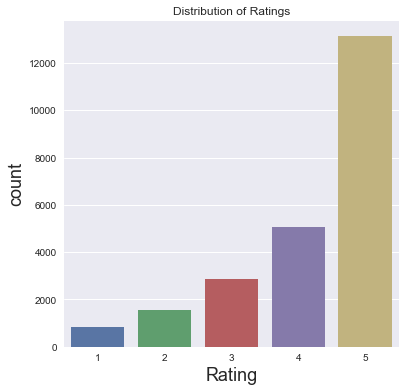

In [85]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Ratings')                         #Ratings count Analysis
sns.countplot(x = 'Rating', data = data_set);
plt.xlabel('Rating',fontsize=18)
plt.ylabel('count',fontsize=18)

In [86]:
def age_group(data_frame):
    '''Function to define the age groups for a dataset'''
    data_frame.loc[data_frame['Age']<25,'Age Group']   = '18-25'
    data_frame.loc[(data_frame['Age']>=25) & (data_frame['Age']<30),'Age Group']   = '25-30'
    data_frame.loc[(data_frame['Age']>=30) & (data_frame['Age']<35),'Age Group']   = '30-35'
    data_frame.loc[(data_frame['Age']>=35) & (data_frame['Age']<40),'Age Group']   = '35-40'
    data_frame.loc[(data_frame['Age']>=40) & (data_frame['Age']<50),'Age Group']   = '40-50'
    data_frame.loc[(data_frame['Age']>=50) & (data_frame['Age']<60),'Age Group']   = '50-60'
    data_frame.loc[(data_frame['Age']>=60) & (data_frame['Age']<70),'Age Group']   = '60-70'
    data_frame.loc[(data_frame['Age']>=70) & (data_frame['Age']<80),'Age Group']   = '70-80'
    data_frame.loc[(data_frame['Age']>=80) & (data_frame['Age']<90),'Age Group']   = '80-90'
    data_frame.loc[(data_frame['Age']>=90),'Age Group']   = '>=90'
    return data_frame                                                # Putting age groups in to bins

In [87]:
division_name_rating = data_set.groupby(['Division Name','Rating']).size().reset_index()
division_name_rating.columns = ['Division Name','Rating','Occurence']

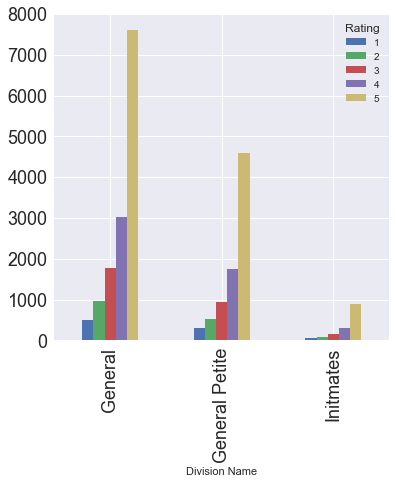

In [88]:
division_name_rating.pivot(index='Division Name',columns='Rating',values='Occurence').reset_index().plot(kind='bar',x='Division Name',fontsize=18)
plt.show()

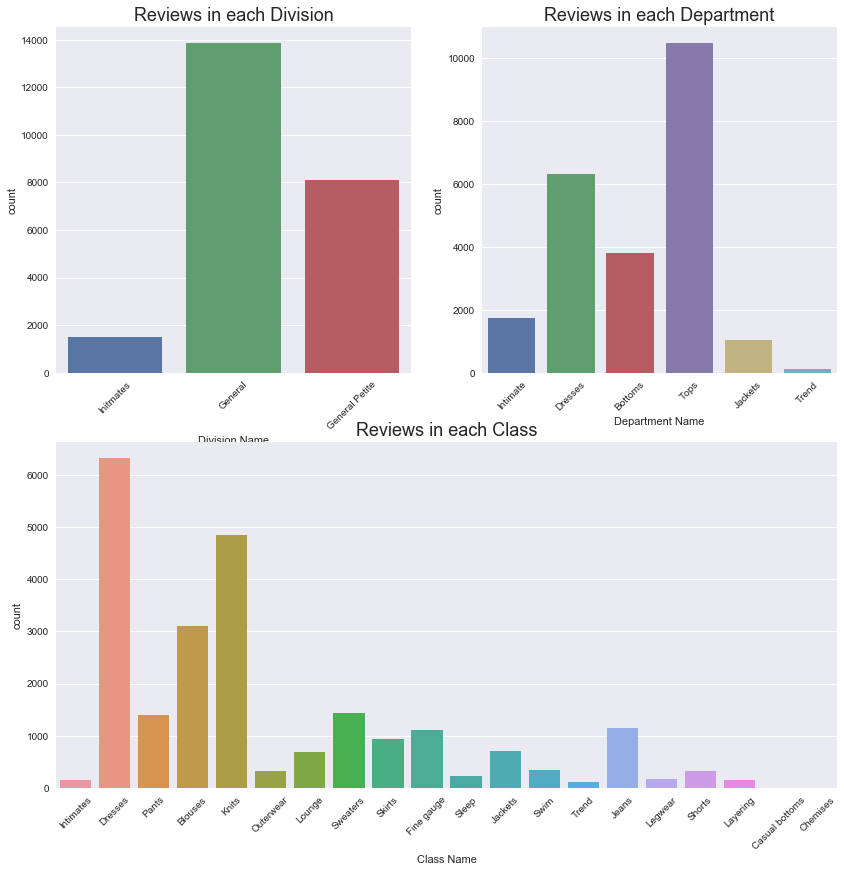

In [89]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(data_set['Division Name'])
ax1 = plt.title("Reviews in each Division",fontsize=18)
                                                    # Distribution of reviews in Division/department/class

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(data_set['Department Name'])
ax2 = plt.title("Reviews in each Department",fontsize=18)


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(data_set['Class Name'])
ax3 = plt.title("Reviews in each Class",fontsize=18)

In [90]:
recommended = data_set[data_set['Recommended IND']==1]
not_recommended = data_set[data_set['Recommended IND']==0]

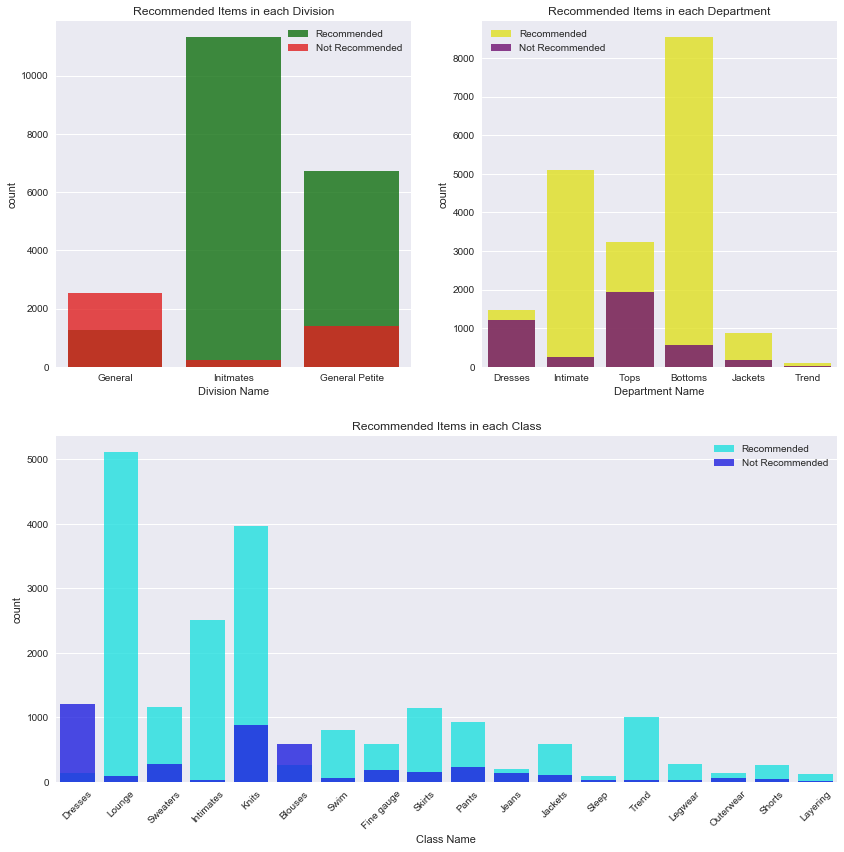

In [91]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

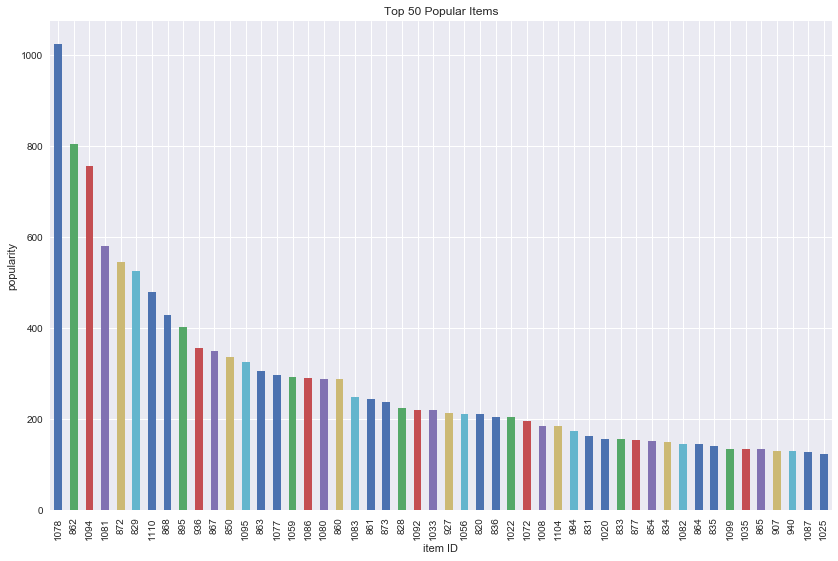

In [92]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
data_set['Clothing ID'].value_counts()[:50].plot(kind='bar');    # Items' popularity based on reviews

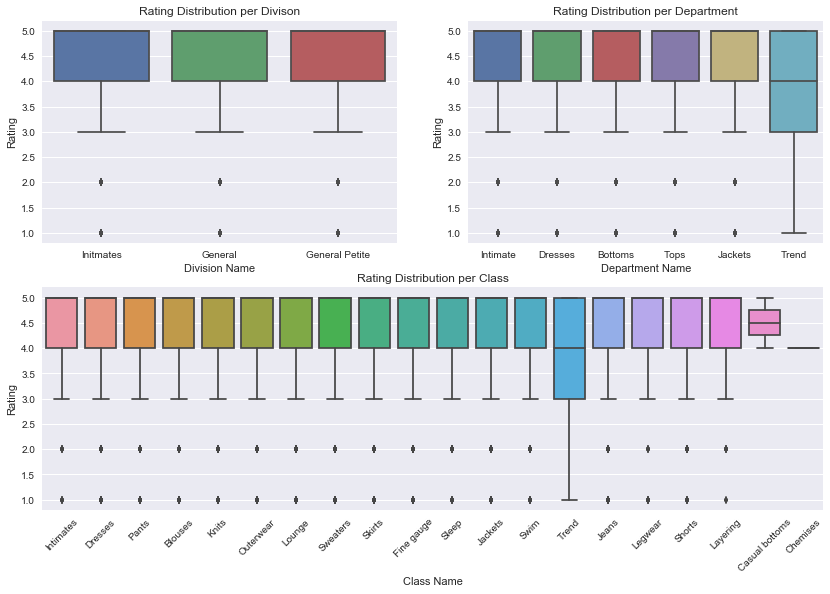

In [95]:
fig = plt.figure(figsize=(14, 9))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division Name", y="Rating", data=data_set)
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department Name", y="Rating", data=data_set)
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class Name", y="Rating", data=data_set)
ax3 = plt.title('Rating Distribution per Class')

In [96]:

df = data_set[['Review Text', 'Rating', 'Class Name']]
#df.info()
#df.describe()
df.head()

,Review Text,Rating,Class Name
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates
1,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants
4,This shirt is very flattering to all due to th...,5,Blouses


In [97]:
df['Review Text'] = df['Review Text'].fillna('')
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def WordCounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return  c

df['Word Counts'] = df['Review Text'].apply(WordCounts)
df.head()

C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Review Text,Rating,Class Name,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


In [104]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

,Review Text,Rating,Class Name,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [120]:
# splitting data
train_data,test_data = train_test_split(df,train_size=0.65,random_state=0)
X = vectorizer.fit_transform(train_data['Review Text'])
y = train_data['Sentiment']




C:\Users\venka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [121]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
nb = MultinomialNB()
nb.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
df1=pd.DataFrame({'Logistic Regression':lr.predict_proba(X)[:,1], 'Naive Bayes':nb.predict_proba(X)[:,1]})
df['Logistic Regression']=df1['Logistic Regression']
df['Naive Bayes']=df1['Naive Bayes']
df.head()

,Review Text,Rating,Class Name,Word Counts,Sentiment,Logistic Regression,Naive Bayes
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True,0.991701,0.999916
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True,0.175960,0.000025
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True,0.207779,0.600741
4,This shirt is very flattering to all due to th...,5,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True,0.874108,0.957867
5,"I love tracy reese dresses, but this one is no...",2,Dresses,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False,0.045716,0.000001


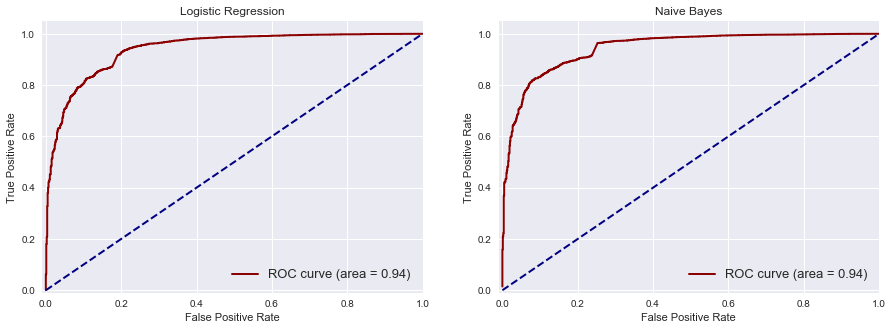

In [124]:
pred_lr = lr.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_lr,tpr_lr,_ = roc_curve(test_data['Sentiment'].values,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_nb,tpr_nb,_ = roc_curve(test_data['Sentiment'].values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

f, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0].legend(loc='lower right', fontsize=13)

axes[1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[1].legend(loc='lower right', fontsize=13)